In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

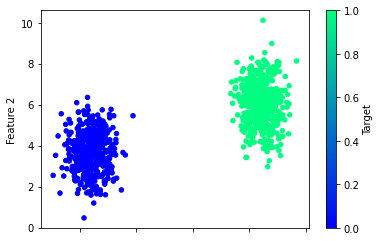

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
df.head()

,Feature 1,Feature 2,Target
0,5.478098,7.203714,1
1,-8.428483,4.121889,0
2,-7.905447,3.323639,0
3,6.411041,5.523013,1
4,7.288599,6.171226,1


In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
# The nn_model object will store the entire architecture of our neural network model. 
# Our next step is to add our first layer, which will contain our inputs and a hidden layer of neurons.
nn_model = tf.keras.models.Sequential()

As we learned earlier, we can add layers to our Sequential model using Keras' Dense class. For our first layer, we need to define a few parameters:

- The input_dimparameter indicates how many inputs will be in the model (in this case two).
- The units parameter indicates how many neurons we want in the hidden layer (in this case one).
- The activation parameter indicates which activation function to use. We'll use the ReLU activation function to allow our hidden layer to identify and train on nonlinear relationships in the dataset.

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

Once again, we'll use the Dense class to tell our Sequential model what to do with the data. This time, we only need to supply the number of output neurons. For a classification model, we only want a yes or no binary decision; therefore, we only need one output neuron. In our previous layer, we used a ReLU activation function to enable nonlinear relationships; however, for our classification output, we want to use a sigmoid activation function to produce a probability output.

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


Now that we have our layers defined, we have to inform the model how it should train using the input data. The process of informing the model how it should learn and train is called compiling the model.

Depending on the function of the neural network, we'll have to compile the neural network using a specific optimization function and loss metric. The optimization function shapes and molds a neural network model while it is being trained to ensure that it performs to the best of its ability. The loss metric is used by machine learning algorithms to score the performance of the model through each iteration and epoch by evaluating the inaccuracy of a single input. To enhance the performance of our classification neural network, we'll use the adam optimizer, which uses a gradient descent approach to ensure that the algorithm will not get stuck on weaker classifying variables and features. As for the loss function, we'll use binary_crossentropy, which is specifically designed to evaluate a binary classification model.

In addition to the optimization function and loss metric, we'll also add a more reader-friendly evaluation metric, which measures the quality of the machine learning model. There are two main types of evaluation metrics—the model predictive accuracy and model mean squared error (MSE). We use accuracy for classification models and msefor regression models. For model predictive accuracy, the higher the number the better, whereas for regression models, MSE should reduce to zero.

In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7192 - accuracy: 0.2733
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7093 - accuracy: 0.3453
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.4173
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4733
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5307
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6844 - accuracy: 0.5840
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.6253
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6653
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.6947
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.7213
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.1108 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1088 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1068 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1049 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1031 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1013 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0995 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0978 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0961 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0945 - accuracy: 1.0000
Epoch 93/100


<AxesSubplot:>

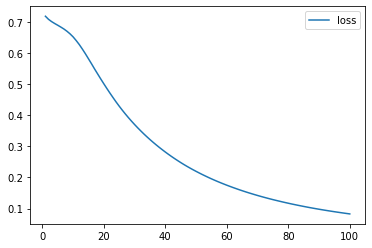

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

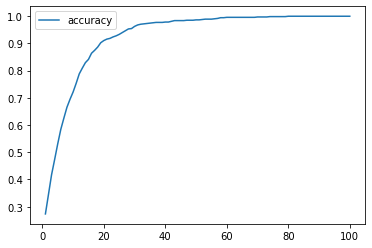

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [14]:
history_df.head(10)

,loss,accuracy
1,0.719177,0.273333
2,0.709313,0.345333
3,0.701998,0.417333
4,0.695879,0.473333
5,0.690237,0.530667
6,0.684370,0.584000
7,0.678166,0.625333
8,0.670906,0.665333
9,0.662551,0.694667
10,0.652804,0.721333


In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0771 - accuracy: 1.0000 - 186ms/epoch - 23ms/step
Loss: 0.07713667303323746, Accuracy: 1.0


In [16]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

## Using more complex, non-linear data

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

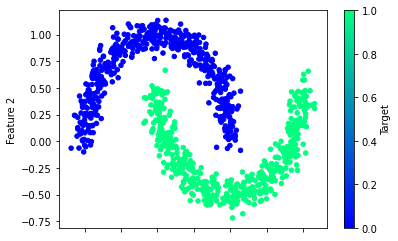

In [17]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [18]:
df_moons

,Feature 1,Feature 2,Target
0,0.676217,0.815220,0
1,1.487143,-0.210519,1
2,-1.027709,0.354966,0
3,0.236012,1.025531,0
4,1.856695,-0.042783,1
...,...,...,...
995,0.816425,0.584748,0
996,0.864083,0.195920,0
997,1.865044,0.086256,1
998,-0.836507,0.167338,0


In [19]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [20]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1119 - accuracy: 0.4427
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9447 - accuracy: 0.4800
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8429 - accuracy: 0.5187
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7744 - accuracy: 0.5427
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7239 - accuracy: 0.5640
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5800
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.5973
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6210 - accuracy: 0.6120
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5953 - accuracy: 0.6280
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.6373
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.2671 - accuracy: 0.8933
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2667 - accuracy: 0.8933
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2662 - accuracy: 0.8933
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.8933
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2655 - accuracy: 0.8933
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2651 - accuracy: 0.8933
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2647 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2643 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2640 - accuracy: 0.8920
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2636 - accuracy: 0.8920
Epoch 93/100


<AxesSubplot:>

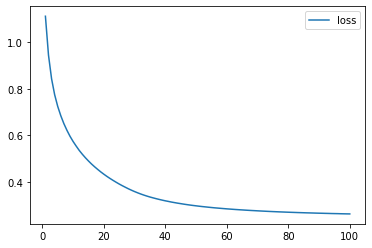

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

In [22]:
history_df

,loss,accuracy
1,1.111866,0.442667
2,0.944654,0.480000
3,0.842917,0.518667
4,0.774384,0.542667
5,0.723915,0.564000
...,...,...
96,0.262382,0.890667
97,0.261957,0.890667
98,0.261684,0.890667
99,0.261387,0.890667


<AxesSubplot:>

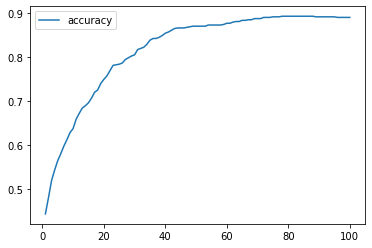

In [23]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Experimenting with more neurons to increase accuracy

In [24]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [25]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [26]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7523 - accuracy: 0.4960
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7120 - accuracy: 0.5107
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.5347
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.5627
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.5973
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5808 - accuracy: 0.6520
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.7053
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.7480
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4929 - accuracy: 0.7720
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4654 - accuracy: 0.7773
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.8973
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.8973
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2470 - accuracy: 0.8987
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2471 - accuracy: 0.8987
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2469 - accuracy: 0.8960
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2468 - accuracy: 0.8960
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2467 - accuracy: 0.8960
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.8960
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.8947
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2464 - accuracy: 0.8960
Epoch 93/100
